In [1]:
import numpy as np
import systema_code as sac
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors

In [2]:
#define grid
numpoints = 61

a1s = np.linspace( -np.pi, np.pi, numpoints)
a2s = np.linspace( -np.pi, np.pi, numpoints)

da1 = np.abs(a1s[1] - a1s[0]) 
da2 = np.abs(a2s[1] - a2s[0]) 

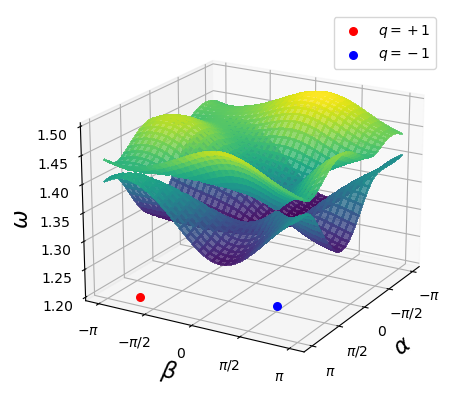

In [3]:
#load in the data
data1 = np.loadtxt("../datas/combinedspectrum_r1_2.6_k3_0.86_61_1")
data2 = np.loadtxt("../datas/combinedspectrum_r1_2.6_k3_0.86_61_2")
data3 = np.loadtxt("../datas/combinedspectrum_r1_2.6_k3_0.86_61_3")

dvec_container = np.zeros( len(a1s) * len(a2s) * 3).reshape(( len(a2s), len(a1s), 3 ))

for i in range(numpoints):
    for j in range(numpoints):
        dvec_container[i,j,0] = data1[i,j]
        dvec_container[i,j,1] = data2[i,j]
        dvec_container[i,j,2] = data3[i,j]

#get the spectrum
freq1s, freq2s = sac.freq_spectrum(dvec_container = dvec_container, style = "surface")

#get the vorticities
phases = sac.phase_func(dvec_container = dvec_container)
vorts = sac.vort_func(phases = phases)

#create the meshgrid for the parameter space
A1, A2 = np.meshgrid(a1s, a2s)

#create the figure itself
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(projection = '3d')

#add labels to the axis
tickvals = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
ticklabels = [r"$-\pi$", r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"]
            
plt.xticks(tickvals, ticklabels)
plt.yticks(tickvals, ticklabels)

plt.xlabel(r"$\alpha$", fontsize = 16)
plt.ylabel(r"$\beta$", fontsize = 16)

ax.zaxis.set_rotate_label(False)  # disable automatic rotation
ax.set_zlabel(r"$\omega$", fontsize = 16, rotation = 90)

ax.set_zlim([1.2,1.5])
    
#change point of view angle
ax.view_init(elev = 20, azim = 30)

#normalize the data for the colormap
vmin = np.min( [ np.min( freq1s[:][:] ) ,np.min( np.min( freq2s[:][:] ) ) ] )
vmax = np.max( [ np.max( freq1s[:][:] ) ,np.max( np.max( freq2s[:][:] ) ) ] )
norm = matplotlib.colors.Normalize(vmin = vmin, vmax = vmax)

#define the surface plots
surf1 = ax.plot_surface( X = A1, Y = A2, Z = freq1s[:,:], cmap = cm.viridis,
                       linewidth = 1, antialiased = False, alpha = 0.8, facecolors = plt.cm.viridis(norm(freq1s)) )

surf2 = ax.plot_surface( X = A1, Y = A2, Z = freq2s[:,:], cmap = cm.viridis,
                       linewidth = 1, antialiased = False, alpha = 0.8, facecolors = plt.cm.viridis(norm(freq2s)) )

da1 = np.abs(a1s[1] - a1s[0]) 
da2 = np.abs(a2s[1] - a2s[0]) 

#iterate through the grid to add Weyl points to the grid
for i in range(len(a2s)):
    for j in range(len(a1s)):

        #if there is a point with vorticitiy close to 1 then plot it as a red dot
        if np.abs( vorts[i,j] - 1 ) < 0.01:
            x = a1s[j] + da1/2
            y = a2s[i] + da2/2
            ax.scatter(x, y, 1.2, color = "red", s = 30, label = r"$q = +1$")

        #if there is a point with vorticitiy close to -1 then plot it as a blue dot
        elif np.abs( vorts[i,j] + 1 ) < 0.01:
            x = a1s[j] + da1/2
            y = a2s[i] + da2/2
            ax.scatter(x, y, 1.2, color = "blue", s = 30, label = r"$q = -1$")

        else:
            pass

#add legend and save the figure
plt.legend()
plt.savefig("../figures/combinedspectrum.svg", dpi = 1200, bbox_inches = "tight")